In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('/fast/groups/ag_kircher/work/MisLa/MisLaReview')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
#os.chdir('/fast/work/groups/ag_kircher/ReMM/MA_Lusi/Snakemake')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### CADD

In [ ]:
import pandas as pd
# KDN,FKDN,RkDN,PD,MCS,IH,RFD
# regHGMD_LR-Ce-01-wmo-a.tsv ClinVar-full-ExAc_LR-Ce-01-wmo-a
test = 'regHGMD_LR-Ce-01-wmo-a'
models = ['entireSet','sampleSet','sampleCADDRFD','sampleCADDPD','sampleCADDMCS',
          'PUAll', 'PUSample','sampleCADDFKDN', 'sampleCADDIH','sampleCADDKDN']

models = ['CADDIter0']
for mod in models:
    print(mod)
    df = pd.read_csv('data/test/results/'+mod+'/tests/'+test+'.tsv',sep = '\t')
    display(df)

for mod in models:
    print(mod)
    df = pd.read_csv('output/'+mod+'_results.txt',sep = '\t')
    display(df)

In [ ]:
import json
with open('configs/params.json') as f:
    data = json.load(f)


### MisLa

In [100]:
#cv = pd.read_csv('../allCVs.csv', sep = '\t', index_col = 'Unnamed: 0')
#allScores = pd.read_csv('../allScores.csv', sep = '\t', index_col = 'Unnamed: 0')

COLS = ["Index","True Positive","False Positive", "True Negative", "False Negative", "Execution Time","Precision","Recall",
"F-score","N"] #	NoiseInd	FoundNoiseInd	Time




noiseLevels = [0.05, 0.1, 0.2, 0.3, 0.4,  0.5, 0.6, 0.7]
datasetSizes = [100,300,500,1000,3000,5000,10000],
noiseType = ["Sym","Asym","Real"]
noiseType = ["Sym"]

datasets = ["Adult","DryBean","Chess","Magic","Iris","ClinVarArt", "ClinVarReal","Encode", "RNA0", "RNA1", "RNA2"]

datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal","EncodeArt", "EncodeReal"]
imps = ['Python','R','CleanLab']
models = ["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD"]
dfs = pd.DataFrame()
for imp in imps:
    #print(imp)
    for name in datasets[:1]:

       # print(name)
        file='output/'+name+'_'+imp+'.csv'
       # print(file)
        df_raw = pd.read_csv(file, sep = '\t',header = None)
        df = df_raw.copy()

        #display(df.head())

        df[0] = df[0].str.replace('\'','')
        df.columns = COLS

        ind = df[df['True Positive']=='failed'].index
        df = df.drop(ind)

        cols = ['Dataset','Model','NoiseLevel','NoiseType','DatasetSize', 'Sample']
        df[cols] = df['Index'].str.replace(' ','').str.split('\[|]|,',expand= True).iloc[:,1:-1]
        df[['NoiseLevel','DatasetSize']] = df[['NoiseLevel','DatasetSize']].astype(float)
       
        df['DatasetSize'] = df['DatasetSize'].astype(int)
        dfs = dfs.append(df)

## delete 0.0 Noise since precision and recall are not defined
dfs.shape


FileNotFoundError: [Errno 2] No such file or directory: 'output/Adult_Python.csv'

In [204]:
#cv = pd.read_csv('../allCVs.csv', sep = '\t', index_col = 'Unnamed: 0')
#allScores = pd.read_csv('../allScores.csv', sep = '\t', index_col = 'Unnamed: 0')

COLS = ["Index","True Positive","False Positive", "True Negative", "False Negative", "Execution Time","Precision","Recall",
"F-score","N","NoiseInd","FoundNoiseInd","Time"]




noiseLevels = [0.05, 0.1, 0.2, 0.3, 0.4,  0.5, 0.6, 0.7]
datasetSizes = [100,300,500,1000,3000,5000,10000],
noiseType = ["Sym","Asym","Real"]
noiseType = ["Sym"]

datasets = ["Adult","DryBean","Chess","Magic","Iris","ClinVarArt", "ClinVarReal","Encode", "RNA0", "RNA1", "RNA2"]

datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal","EncodeArt", "EncodeReal"]
imps = ['Python','R','CleanLab']
models = ["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD"]
dfs = pd.DataFrame()
for imp in imps:
    #print(imp)
    for name in datasets[:]:

       # print(name)
        file='BU_output/'+name+'_'+imp+'_Extended.csv'
       # print(file)
        df_raw = pd.read_csv(file, sep = '\t',header = None)
        df = df_raw.copy()

        #display(df.head())

        df[0] = df[0].str.replace('\'','')
        df.columns = COLS

        ind = df[df['True Positive']=='failed'].index
        df = df.drop(ind)

        cols = ['Dataset','Model','NoiseLevel','NoiseType','DatasetSize', 'Sample']
        df[cols] = df['Index'].str.replace(' ','').str.split('\[|]|,',expand= True).iloc[:,1:-1]
        df[['NoiseLevel','DatasetSize']] = df[['NoiseLevel','DatasetSize']].astype(float)
       
        df['DatasetSize'] = df['DatasetSize'].astype(int)
        dfs = dfs.append(df)

## delete 0.0 Noise since precision and recall are not defined
dfs = dfs.reset_index(drop = True)
dfs.shape


(37922, 19)

In [153]:
models =d
dfs = dfs[~dfs['Model'].isin(models)]
dfs = dfs[~dfs['False Negative'].isna()]
dfs = dfs.reset_index(drop = True)


In [197]:
dfs.head()

,Index,True Positive,False Positive,True Negative,False Negative,Execution Time,Precision,Recall,F-score,N,NoiseInd,FoundNoiseInd,Time,Dataset,Model,NoiseLevel,NoiseType,DatasetSize,Sample
0,"[Adult, C45votingFilter, 0.4, Sym, 100, 0]",2.0000,8.0000,52.0000,38.0000,9.3910,0.2000,0.0500,0.0800,100.0000,"[0, 1, 4, 6, 7, 9, 13, 17, 18, 21, 25, 26, 31,...","[14, 35, 42, 50, 57, 67, 73, 84, 89, 95]",1644062145.4679,Adult,C45votingFilter,0.4000,Sym,100,0
1,"[Adult, ORBoostFilter, 0.05, Asym, 100, 0]",0.0000,20.0000,75.0000,5.0000,8.7967,0.0000,0.0000,0.0000,100.0000,"[2, 14, 25, 32, 78]","[3, 8, 15, 17, 19, 33, 35, 38, 42, 43, 47, 52,...",1644062145.6971,Adult,ORBoostFilter,0.0500,Asym,100,0
2,"[Adult, CVCF, 0.2, Asym, 3000, 0]",79.0000,269.0000,2131.0000,521.0000,11.8082,0.2270,0.1317,0.1667,3000.0000,"[6, 15, 20, 22, 34, 36, 38, 42, 47, 48, 50, 56...","[8, 21, 37, 65, 73, 78, 91, 97, 98, 108, 113, ...",1644062148.6788,Adult,CVCF,0.2000,Asym,3000,0
3,"[Adult, C45iteratedVotingFilter, 0.05, Asym, 5...",5.0000,69.0000,406.0000,20.0000,12.2332,0.0676,0.2000,0.1010,500.0000,"[1, 10, 14, 85, 106, 107, 113, 133, 136, 218, ...","[5, 11, 18, 21, 31, 44, 59, 60, 63, 73, 74, 78...",1644062149.0620,Adult,C45iteratedVotingFilter,0.0500,Asym,500,0
4,"[Adult, IPF, 0.05, Sym, 3000, 0]",38.0000,521.0000,2329.0000,112.0000,16.3630,0.0680,0.2533,0.1072,3000.0000,"[7, 29, 55, 92, 118, 137, 141, 163, 204, 227, ...","[3, 13, 26, 29, 30, 35, 36, 43, 56, 60, 61, 79...",1644062152.0706,Adult,IPF,0.0500,Sym,3000,0


In [205]:
ad = dfs[dfs['Model'].isin( ["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD","CleanLab"])]
ad = ad[['Index','Model', 'Dataset', 'NoiseLevel', 'NoiseType', 'DatasetSize', 'Precision', 'Recall', 'F-score']]

ad

,Index,Model,Dataset,NoiseLevel,NoiseType,DatasetSize,Precision,Recall,F-score
0,"[Adult, PD, 0.4, Sym, 5000, 0]",PD,Adult,0.4000,Sym,5000,0.7216,0.7635,0.7420
1,"[Adult, PD, 0.1, Asym, 1000, 0]",PD,Adult,0.1000,Asym,1000,0.3226,0.7000,0.4416
2,"[Adult, MCS, 0.05, Sym, 100, 0]",MCS,Adult,0.0500,Sym,100,0.0500,1.0000,0.0952
3,"[Adult, MCS, 0.3, Asym, 300, 0]",MCS,Adult,0.3000,Asym,300,0.6395,0.6111,0.6250
4,"[Adult, IH, 0.4, Sym, 5000, 0]",IH,Adult,0.4000,Sym,5000,0.5526,0.6535,0.5989
...,...,...,...,...,...,...,...,...,...
37917,"[EncodeReal, CleanLab, 0.2, Real, 10000, 1]",CleanLab,EncodeReal,0.2000,Real,10000,0.6423,0.5145,0.5713
37918,"[EncodeReal, CleanLab, 0.05, Real, 3000, 0]",CleanLab,EncodeReal,0.0500,Real,3000,0.2799,0.5467,0.3702
37919,"[EncodeReal, CleanLab, 0.05, Real, 3000, 1]",CleanLab,EncodeReal,0.0500,Real,3000,0.2425,0.4333,0.3110
37920,"[EncodeReal, CleanLab, 0.05, Real, 5000, 0]",CleanLab,EncodeReal,0.0500,Real,5000,0.2591,0.4560,0.3304


In [191]:
from sklearn.metrics import precision_recall_fscore_support as score

predictions = dfs
li = []
for i in range(len(predictions[:])):
    #print(i,predictions.iloc[i,2])
    N = int(predictions.loc[i,"N"])
    
    temp = predictions.loc[i,"NoiseInd"].replace('[','').replace(']','')
    trueNoise = pd.Series([0]*N)
    ind = pd.Series([int(s) for s in temp.split(',')])
    trueNoise[ind]=1

    
    predictedNoise = pd.Series([0]*N)
    temp = predictions.loc[i,"FoundNoiseInd"].replace('[','').replace(']','')
    ind = pd.Series([int(s) for s in temp.split(',')])-1
    ind = ind[ind>0]
    
    predictedNoise[ind]=1
    
    #df.loc[i,['Precision','Recall','F-score']] = score(trueNoise, predictedNoise, average = 'binary')[:3]
    scores = score(trueNoise, predictedNoise, average = 'binary')
    temp = predictions.loc[i,['Index','Model','Dataset','NoiseLevel','NoiseType','DatasetSize']].append(pd.Series(scores)[:3])
    li.append(temp)
    
    

In [208]:
df = pd.DataFrame(li)
df.columns = ['Index','Model', 'Dataset', 'NoiseLevel', 'NoiseType', 'DatasetSize', 'Precision', 'Recall', 'F-score']




In [183]:
dfs.shape
mod = pd.read_csv('figures/models.txt',sep = '\t')
groups = ['Similarity','Ensemble','Single']
drop = ['saturationFilter', 'classifSF', 'DROP1', 'DROP2',
                                 'DROP3', 'EWF', 'TomekLinks','consensusSF','INFFC','ModeFilter', 'ENG']
mod = mod[~mod['Abbreviation'].isin(drop)]
#for group in groups:   
    #print(mod[mod['Group']==group]['Abbreviation'])
print(mod[mod['Package'].isin(['NoiseFiltersR'])]['Abbreviation'].to_list())


['C45votingFilter', 'ORBoostFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN', 'C45robustFilter', 'HARF', 'BBNR', 'PRISM', 'PF', 'hybridRepairFilter', 'dynamicCF', 'EF', 'GE', 'edgeBoostFilter', 'AENN', 'RNN']


In [ ]:
df = pd.DataFrame(dfs['Model'].value_counts().reset_index())
df[['Name','Group','Author']]=''

df['Model']='NoiseFiltersR'
df.loc[df['index'].isin(["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD"]),'Model']='Scikit-Clean'

df.loc[df['index']=='CleanLab','Model']='CleanLab'
df[['Name','Group','Author']]=''
df.columns= ['Abbreviation','Implementation','Full name','Group','Author']
df.to_csv("figures/models.csv",sep = '\t',index = False)


In [ ]:
Dataset='Adult'
NoiseType = 'Sym'
Models = ['PD','hybridRepairFilter']
dfs[(dfs['Dataset']==Dataset)&(dfs['NoiseType']==NoiseType)&(dfs['Model'].isin(Models))]

In [211]:
df = df.append(ad)

In [212]:
df['Model'].unique()

array(['C45votingFilter', 'ORBoostFilter', 'CVCF',
       'C45iteratedVotingFilter', 'IPF', 'CNN', 'C45robustFilter', 'HARF',
       'BBNR', 'hybridRepairFilter', 'AENN', 'TomekLinks', 'RNN', 'INFFC',
       'DROP2', 'saturationFilter', 'DROP3', 'DROP1', 'EWF', 'ENG',
       'edgeBoostFilter', 'PRISM', 'EF', 'GE', 'consensusSF', 'classifSF',
       'ModeFilter', 'PD', 'MCS', 'IH', 'RkDN', 'FKDN', 'RFD', 'KDN',
       'CleanLab'], dtype=object)

255
262
256
262
262


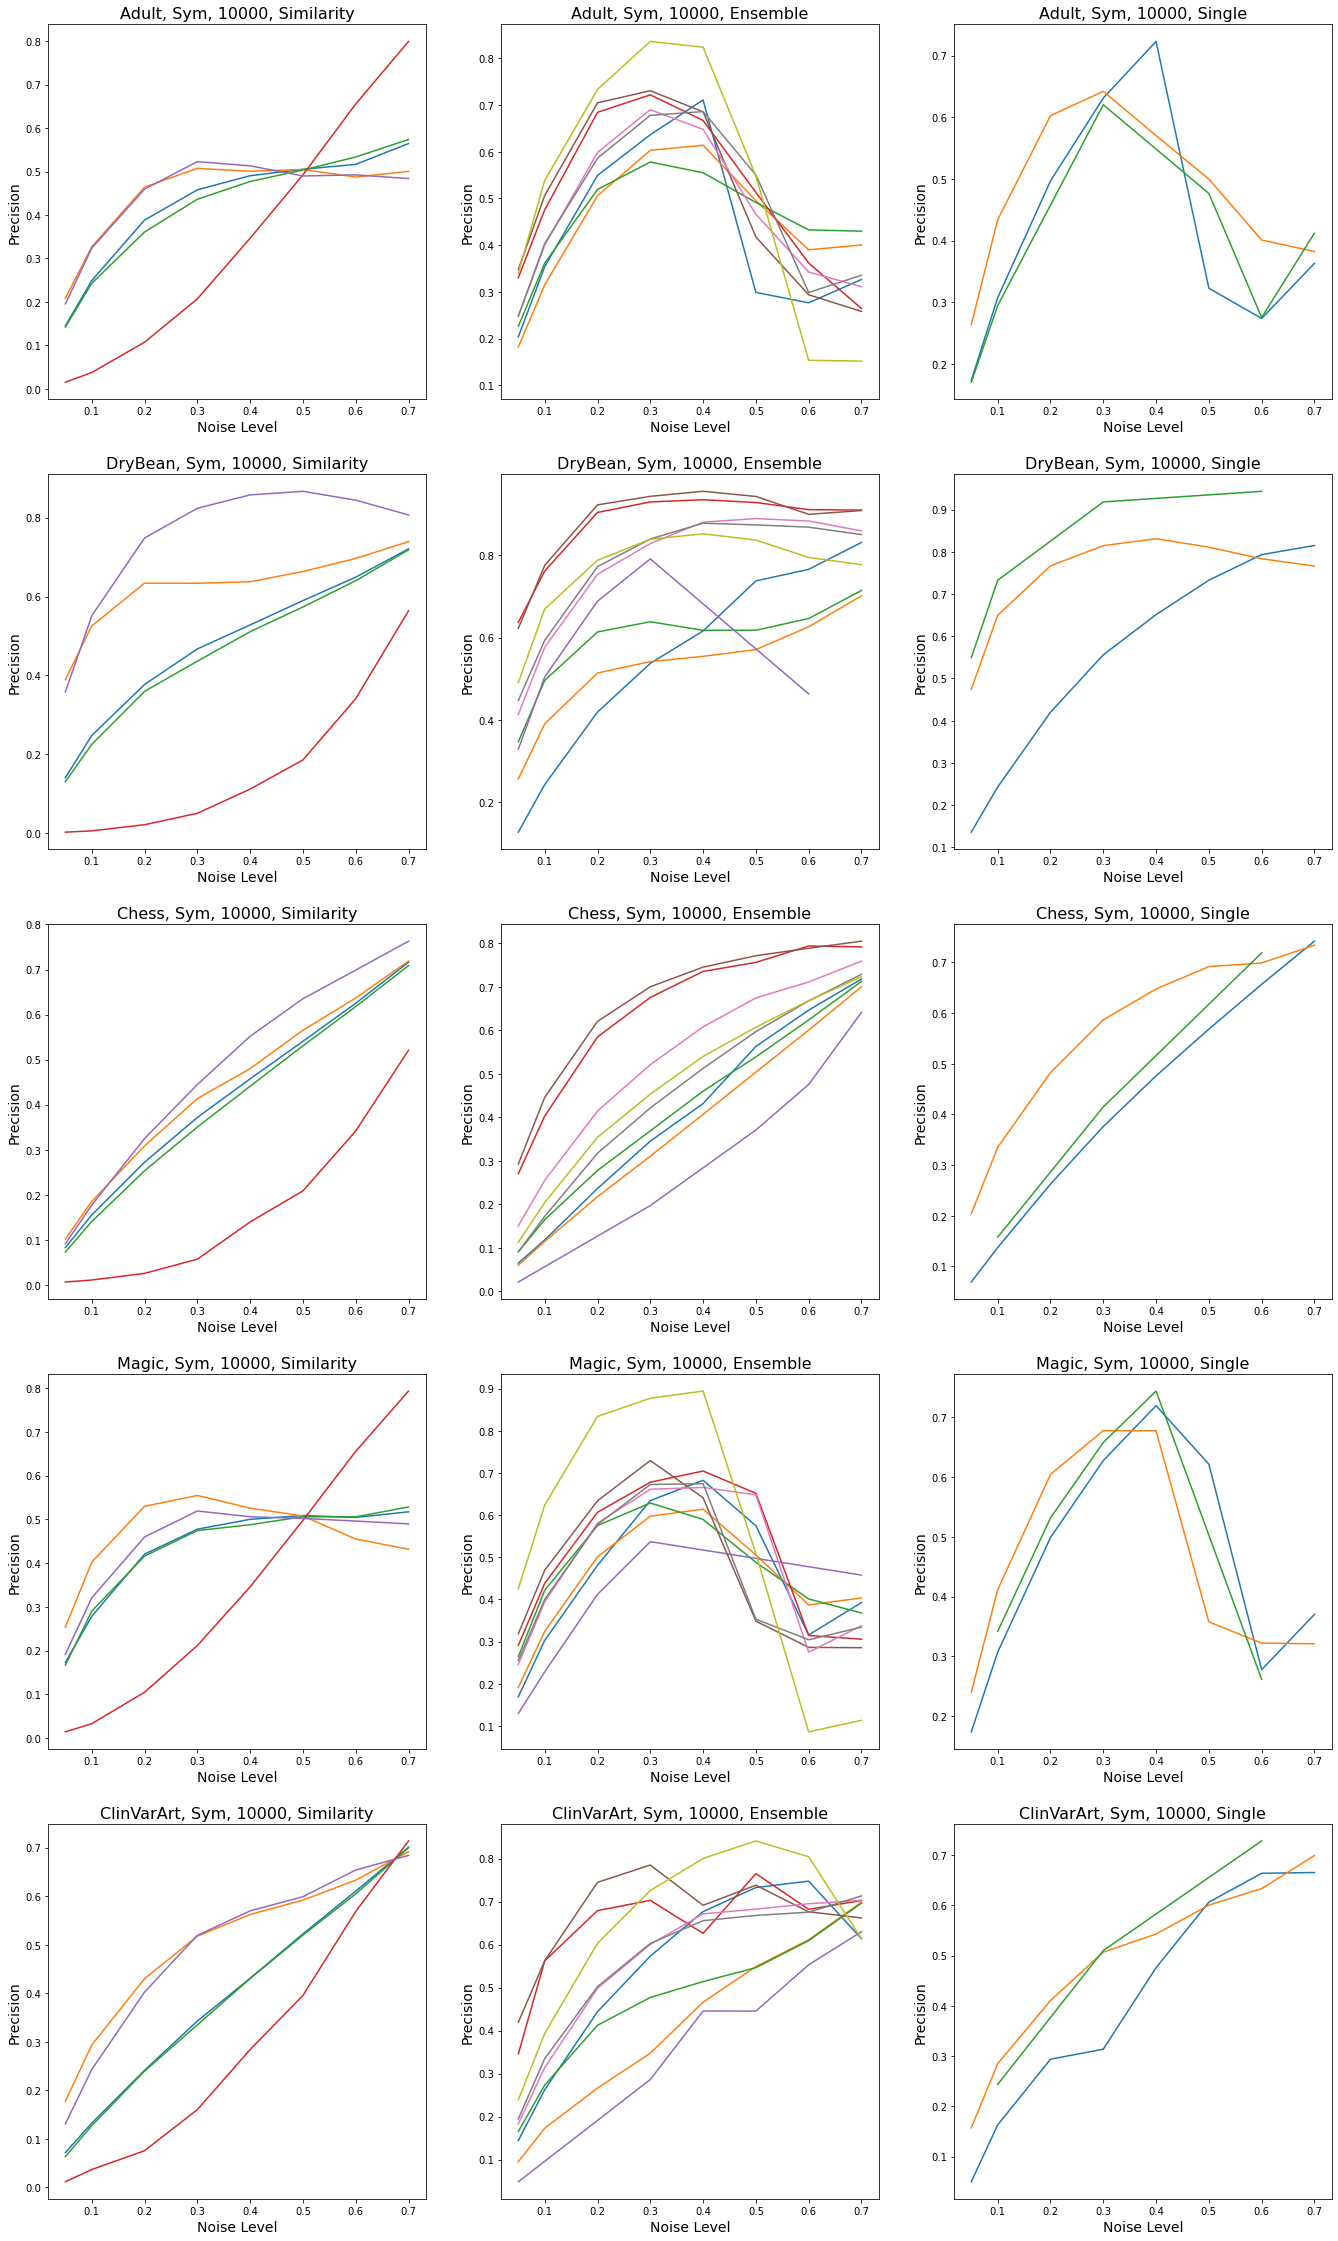

In [213]:
## Performance wrt to particular model 

models = ["FKDN"]
models = ["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD","CleanLab"]
models = ['C45votingFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN',
       'C45robustFilter', 'HARF', 'BBNR', 'ORBoostFilter', 'PRISM',
       'TomekLinks', 'PF', 'hybridRepairFilter', 'dynamicCF', 'EF', 'DROP1',
       'GE', 'DROP3', 'DROP2', 'edgeBoostFilter', 'INFFC', 'classifSF', 'AENN',
       'consensusSF', 'RNN', 'ModeFilter', 'ENG', 'saturationFilter', 'EWF']
models = df['Model'].unique()
#models = ['PD', 'MCS', 'IH', 'RkDN', 'FKDN', 'RFD', 'KDN', 'C45votingFilter', 
#'ORBoostFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN', 'C45robustFilter', 
#'HARF', 'BBNR']
NoiseTypes = ["Sym","Asym","Real"]
NoiseTypes = ["Sym"]
#NoiseType=''
variable = 'NoiseLevel'
#constant = ''
Score = 'Precision'
NoiseLevel = ''
allScores = df
DatasetSize = 10000

datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt"]
n = len(datasets)
fig, axs = plt.subplots(n,3,figsize=(23,40))

for j,Dataset in enumerate(datasets[:n]):

    scores = allScores[((allScores['Dataset'].str.contains(Dataset)) 
              # &(allScores['NoiseType'].str.contains(NoiseType)) 
              # &(allScores['Score'].str.contains(Score))
                &(allScores['DatasetSize']==DatasetSize))
              #  &(allScores['DatasetSize'].astype(str).str.len()==len(str(DatasetSize)))
            #  &(allScores['NoiseLevel'].astype(str).str.contains(str(NoiseLevel)))
                   ]
    print(len(scores))
    #fig, axs = plt.subplots(1,3,figsize=(16,4))

    for noiseType in NoiseTypes:
        for i,group in enumerate(groups):  
            #print(i)
            models = mod[mod['Group']==group]['Abbreviation']
                #plt.figure(figsize=(8,5))
            for model in models[:]:

                table = scores[scores['Model'] == model]
                table = table[table['NoiseType'] == noiseType]
                
                if len(table) > 0:
                    table = table.sort_values([variable])
                    table = pd.DataFrame(table.groupby('Index').mean())
                axs[j,i].plot(table[variable],table[Score].astype(float),  label = model)
              #  plt.plot(table[variable],table[Score].astype(float),  label = model)
             #   plt.legend()
             #   plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

                axs[j,i].set_title("{}, {}, {}, {}".format(Dataset,noiseType,str(DatasetSize), group), fontsize = 16 )
            #  plt.title("Dataset: {}, noise type: {}, group: {}".format(Dataset,noiseType,\
            #                                      group), fontsize = 16 )
                axs[j,i].set_xlabel('Noise Level',fontsize = 14 )


                axs[j,i].set_ylabel(Score,fontsize = 14 )
                #plt.savefig('figures/'+Dataset+Score+noiseType+'.png',transparent=True)
      #  plt.savefig('figures/test.png',transparent=False,bbox_inches = 'tight'
                  #  ,pad_inches = 0
                 #  )


262
0
0
0
0
134


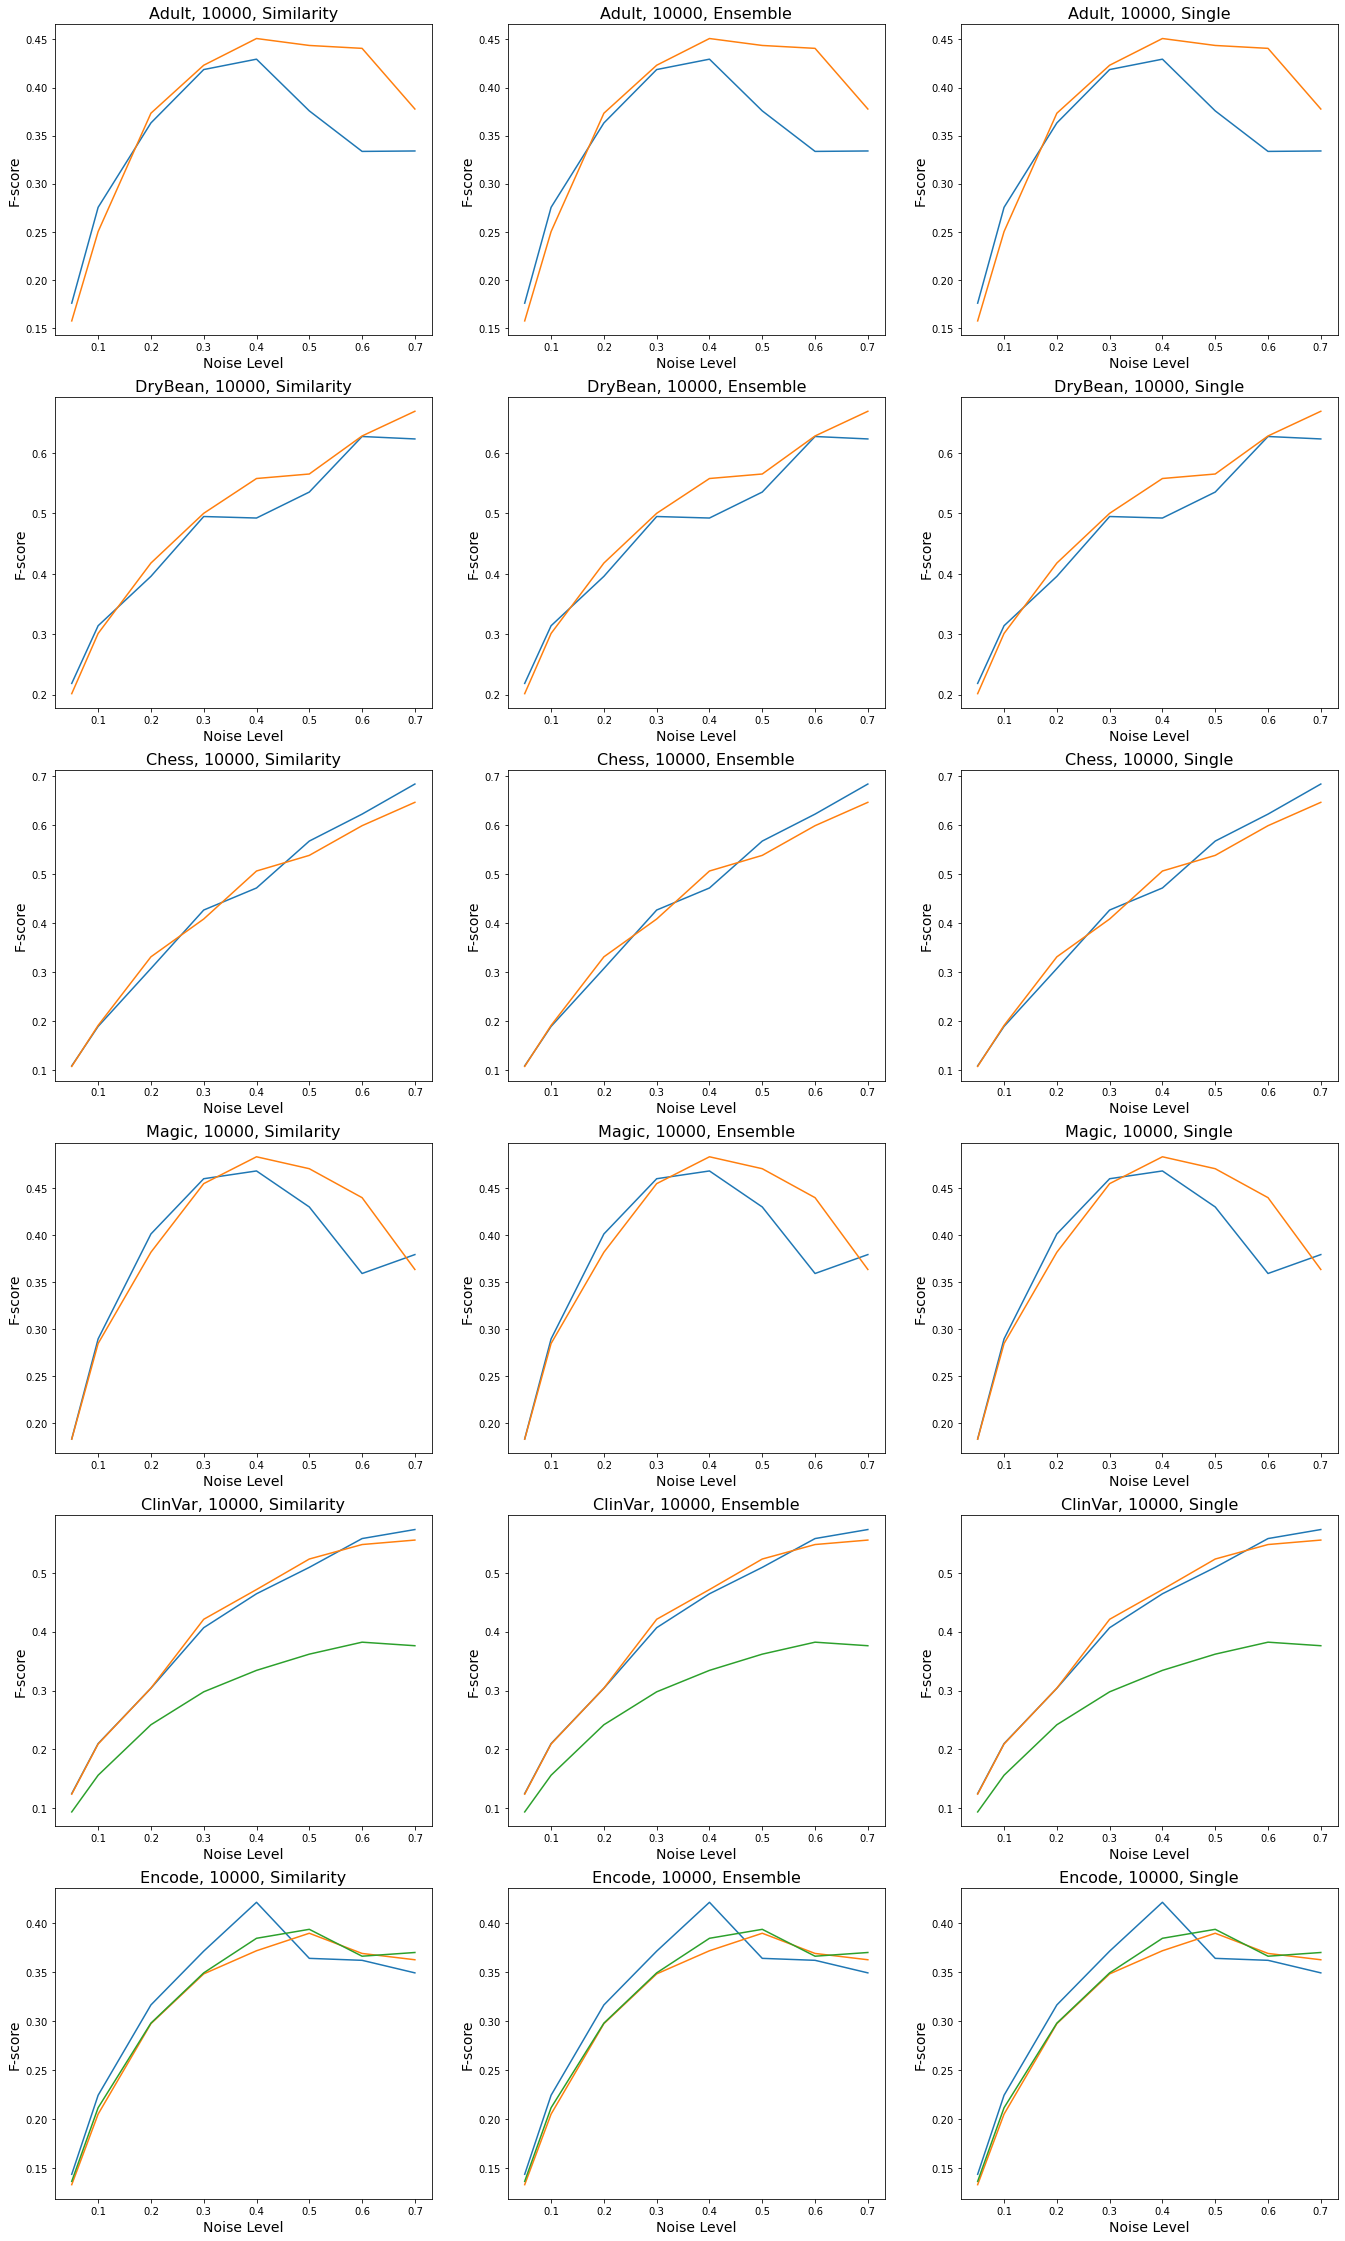

In [215]:
## Performance wrt noise type and noise level
variable = 'NoiseLevel'
Score = 'F-score'
DatasetSize = 10000
datasets = ["Adult","DryBean","Chess","Magic","ClinVar", "Encode"]

n = len(datasets)
NoiseTypes = ["Sym","Asym", "Real"]
allScores = dfs

fig, axs = plt.subplots(n,3,figsize=(23,40))

for j,Dataset in enumerate(datasets[:n]):

    scores_raw = allScores[((allScores['Dataset'].str.contains(Dataset)) 
                &(allScores['DatasetSize']==DatasetSize))
                   ]
    print(len(scores))
    for noiseType in NoiseTypes:
        scores = scores_raw[scores_raw['NoiseType'] == noiseType]
        for i,group in enumerate(groups):  
                table = scores.groupby('NoiseLevel').mean().reset_index()

                if len(table) > 0:
                    axs[j,i].plot(table[variable],table[Score].astype(float),  label = noiseType)
                    axs[j,i].set_title("{}, {}, {}".format(Dataset,str(DatasetSize), group), fontsize = 16 )
                    axs[j,i].set_xlabel('Noise Level',fontsize = 14 )
                    axs[j,i].set_ylabel(Score,fontsize = 14 )
#plt.savefig('figures/test1.png',transparent=False,bbox_inches = 'tight'
    #                           )


5778
5778
5778
5766
5766
5766
5790
5790
5790
5773
5773
5773
8583
8583
8583
2496
2496
2496


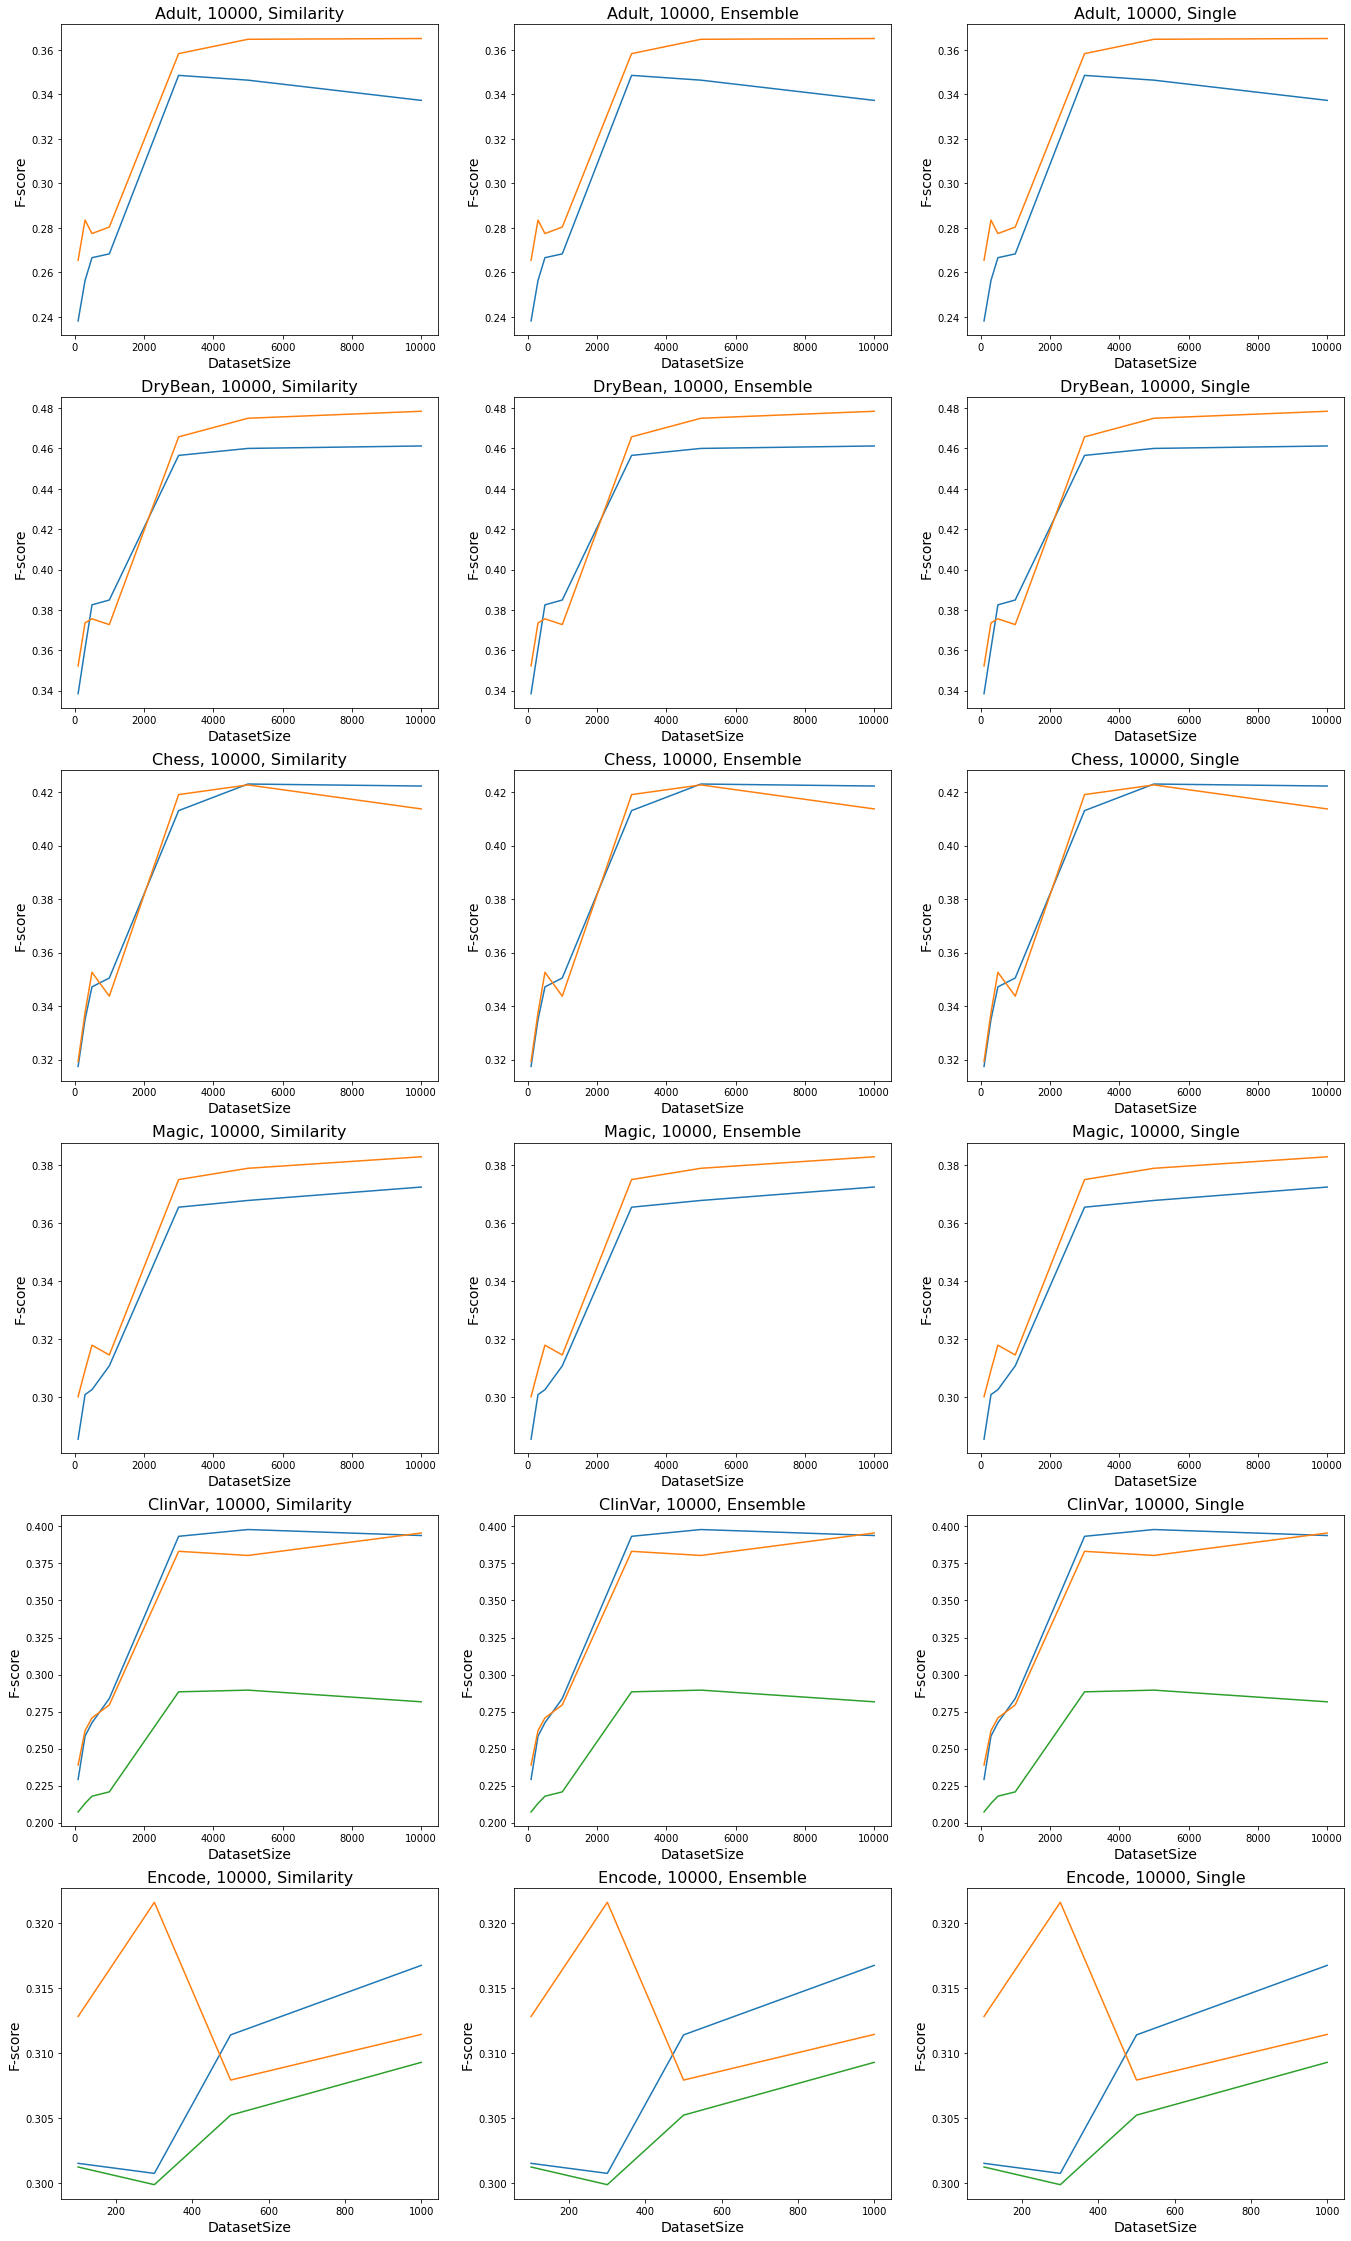

In [141]:
### Performance wrt dataset size and noise type
variable = 'DatasetSize'
Score = 'F-score'
datasets = ["Adult","DryBean","Chess","Magic","ClinVar", "Encode"]

n = len(datasets)
NoiseTypes = ["Sym","Asym", "Real"]
allScores = dfs

fig, axs = plt.subplots(n,3,figsize=(23,40))

for j,Dataset in enumerate(datasets[:n]):

    scores_raw = allScores[((allScores['Dataset'].str.contains(Dataset)) 
             #   &(allScores['DatasetSize']==DatasetSize)
                           )]
    for noiseType in NoiseTypes:
        scores =scores_raw[scores_raw['NoiseType'] == noiseType]
        #print(len(scores_raw))

        for i,group in enumerate(groups):  
                table = scores.groupby(variable).mean().reset_index()

                if len(table) > 0:
                    axs[j,i].plot(table[variable],table[Score].astype(float),  label = noiseType)
                    axs[j,i].set_title("{}, {}, {}".format(Dataset,str(DatasetSize), group), fontsize = 16 )
                    axs[j,i].set_xlabel(variable,fontsize = 14 )
                    axs[j,i].set_ylabel(Score,fontsize = 14 )
    plt.savefig('figures/test2.png',transparent=False,bbox_inches = 'tight'
                               )


In [137]:
scores_raw

,Index,True Positive,False Positive,True Negative,False Negative,Execution Time,Precision,Recall,F-score,N,Dataset,Model,NoiseLevel,NoiseType,DatasetSize,Sample


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *



#idx = Index(np.arange(1,11))
#df = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])
for Dataset in datasets[:]:
    print(Dataset)
    scores = allScores[((allScores['Dataset'].str.contains(Dataset)) 
               &(allScores['NoiseType'].str.contains(NoiseType)) 
              # &(allScores['Score'].str.contains(Score))
                &(allScores['DatasetSize'].astype(str).str.contains(str(DatasetSize),regex = True))
                &(allScores['DatasetSize'].astype(str).str.len()==len(str(DatasetSize)))
           #   &(allScores['NoiseLevel'].astype(str).str.contains(str(NoiseLevel)))
                   )]


    df = scores.pivot_table(values=Score, index='Model', columns='NoiseLevel', aggfunc='first')
    df= df.astype(float).round(4)
    vals = df.values# np.around(df.values,4)
    Min=vals.astype(float).min().min()
    Max=vals.astype(float).max().max()
    norm = plt.Normalize(Min-1, Max+1)
    #norm = plt.Normalize(0, 1)
    colours = plt.cm.hot(norm(vals))

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

    ytable=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                        colWidths = [0.2]*vals.shape[1]
                      #  colHeights = [0.2]*vals.shape[0]
                        , loc='center', 
                        cellColours=colours)
    ytable.set_fontsize(34)
    ytable.scale(1, 4)
    plt.show()
    plt.show()


### Other

In [ ]:
path = "/fast/groups/ag_kircher/CADD/projects/bStatistic/github_repo_fork/scripts/pipeline/schemas/config.schema.yaml"
from snakemake.utils import validate
config = '..GRCh38/entireSet_config.yml'
#validate(config, schema=path)
models = {}
with open(config['ModelConfigSK'], 'r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        fields=line.rstrip().split('\t')
        models[fields[0]]={'classifier': fields[1], 'args': fields[2]}


In [ ]:
import yaml
file = "/fast/users/nazaretl_c/work/MisLaProject/configs/test.json"
file = "../GRCh38/entireSet_config.yml"
with open(file, 'r') as j:
     config = yaml.safe_load(j.read())

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
import pandas as pd
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import joblib
model = str(snakemake.input)
dataset = str(snakemake.wildcards.modelNew)

#model = 'data/skmodels/entireSet/LR-Ce-01-wmo-i013.mod'
clf = joblib.load(model) 
pipe = make_pipeline(clf[1], clf[0])

name1 = dataset + '_simulation'
name2 = dataset + '_humanDerived'

chunksize = 10 ** 6
names = [name1, name2]
for name in names:
    i = 0
    file = 'data/GRCh38/'+name+'/imputation/SNV.csv.gz'
    for chunk in pd.read_csv(file, chunksize = chunksize,
                             nrows = 100,
                             sep = ',',  header = None):
        print(i, name)
        chunk = chunk.iloc[:,1:].to_numpy()
        labels = pd.Series(pipe.predict(chunk))

      #  labels.to_csv('data/predictedLabels/'+name+'.cvs', sep = '\t', 
       #               index = False, header = False, 
        #                 mode = 'a')
        i += 1


In [ ]:
with open(file, 'r') as j:
     config = json.loads(j.read())

In [ ]:
config['ModelConfigSK']

In [ ]:
with open(config['ModelConfigSK'], 'r') as f:
    print(f)

In [ ]:
#df = pd.read_csv('../data/predictedLabels/entireSet_humanDerived.cvs',header= None)
df = pd.read_csv('../data/predictedLabels/entireSet_simulation.cvs',header= None)

In [ ]:
df[0].value_counts(normalize = True)

In [ ]:
'file'